#### BLM442 Vize Ödevi

#### İsim/Soyisim:Murat Altınay
#### Öğrenci Numarası:170202109
#### E-mail:170202109@kocaeli.edu.tr
#### Konu:Covid-19 Salgın Verileriyle Analiz ve Görselleştirme

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk
df = pd.read_csv("C:/Users/immur/Desktop/covid_19_daily_reports.csv")
df1=pd.read_csv("C:/Users/immur/Desktop/Population.csv")
df2=pd.read_csv("C:/Users/immur/Desktop/covid19_us.csv")

#### Problem 1: 23 Nisan tarihi itibariyle ülkelere göre onaylanmış vaka sayılarını büyükten küçüğe sıralayınız.
Açıklama: En çok vaka görülen ilk on ülke sıralanmıştır.

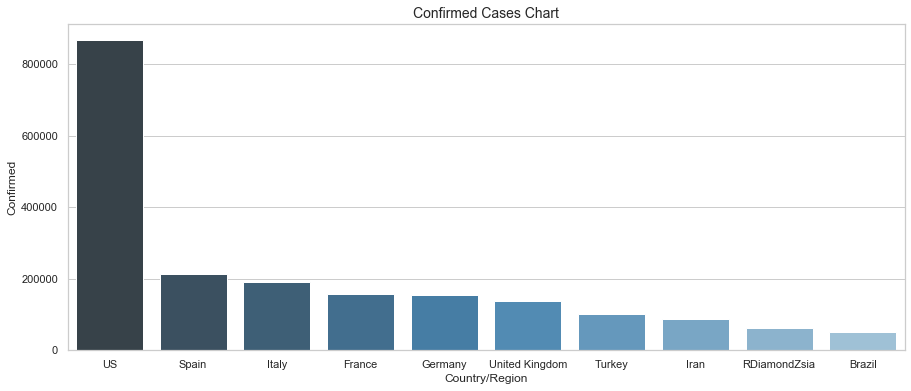

In [2]:
df_sub=df[['Country/Region','Last_Update','Confirmed']]
df_sub=df_sub[df_sub['Last_Update']=='2020-04-23'].groupby(['Last_Update','Country/Region']).sum()
dff=df_sub.sort_values(by = ['Confirmed'], ascending = [False] ).head(10)
dff.reset_index(inplace=True)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize']='15,6'
plt.title("Confirmed Cases Chart",fontsize=14)
sns.barplot(x='Country/Region', y='Confirmed', data=dff,palette="Blues_d")

#### Problem 2: Covid-19 virüsün ülkelere göre bir günde ortalama yayılma hızlarını karşılaştırınız.
Açıklama: Virüsün herhangi bir ülkede görüldüğü ilk gün ve 23 Nisan tarihleri arasındaki günlük ortalama yeni vaka sayılarına göre yayılma hızları karşılaştırılmıştır.

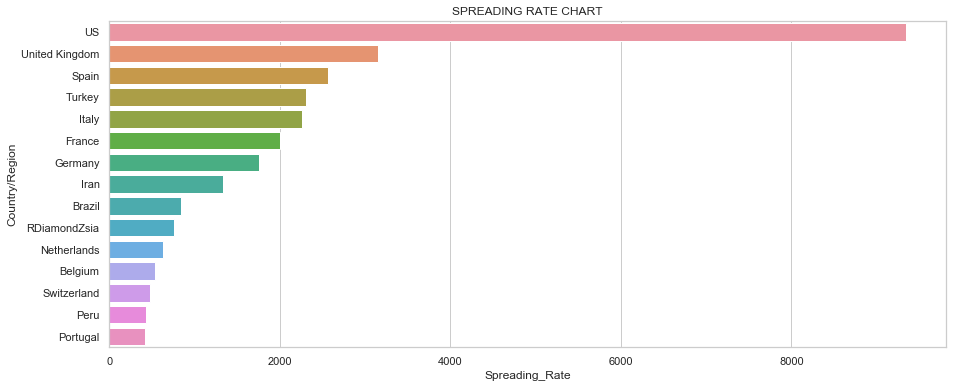

In [3]:
df_sub=df[['Country/Region','Last_Update','Confirmed']].groupby(['Last_Update','Country/Region']).sum()
df_sub.reset_index(inplace=True)
dff=df_sub.groupby(['Country/Region']).agg('count')
dff.reset_index(inplace=True)
dff1=df_sub.groupby(['Country/Region']).agg('max')
dff1.reset_index(inplace=True)
dff2=pd.DataFrame()
dff2['Country/Region']=dff1['Country/Region']
dff2['Spreading_Rate']=dff1['Confirmed']/dff['Confirmed']
dff2=dff2.sort_values(by = ['Spreading_Rate'], ascending = [False]).head(15)
plt.rcParams['figure.figsize']='15,6'
plt.title("SPREADING RATE CHART",fontsize=12)
sns.barplot(y='Country/Region',x='Spreading_Rate', data=dff2)

#### Problem 3:Günlük ortalama yayılma hızı en yüksek ilk beş ülkenin vaka artış grafiklerinin grafikle karşılaştırılması.
Açıklama: Önceki soruda bulunan en yüksek yayılma hızına sahip beş ülkenin yayılma hızlarını günlük olarak aynı grafikte gösterilmiştir.

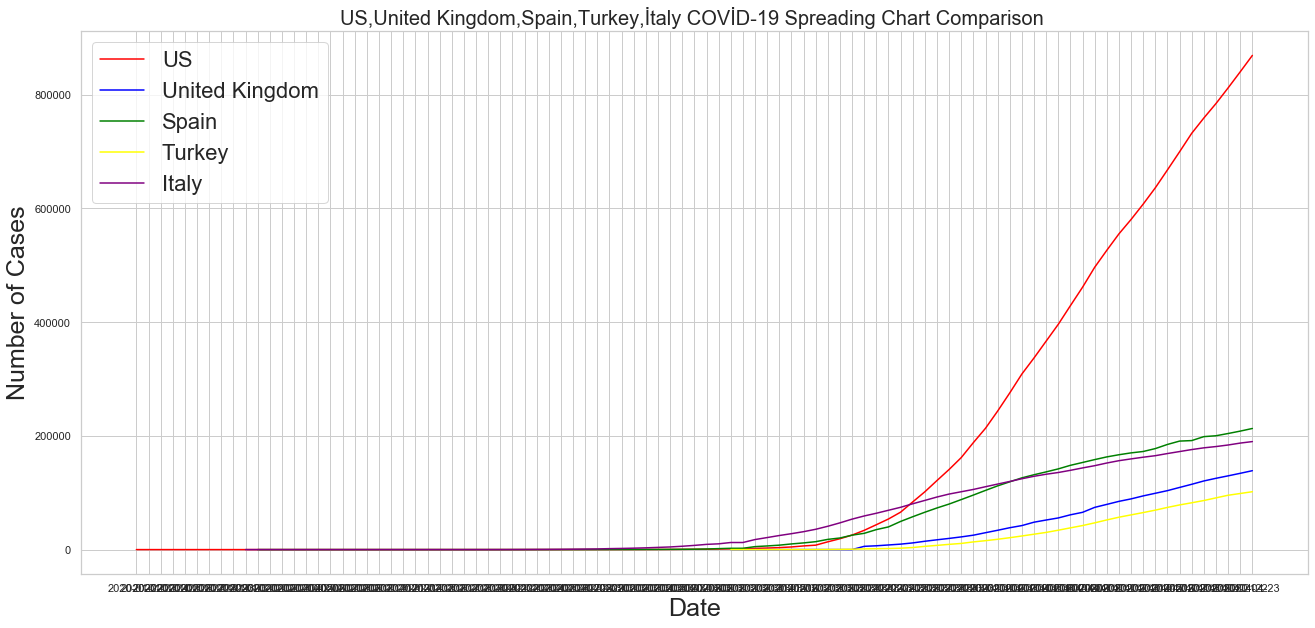

In [4]:
us=df_sub[df_sub['Country/Region'] == 'US']
england=df_sub[df_sub['Country/Region'] == 'United Kingdom']
spain=df_sub[df_sub['Country/Region'] == 'Spain']
turkey=df_sub[df_sub['Country/Region'] == 'Turkey']
italy=df_sub[df_sub['Country/Region'] == 'Italy']
q1=pd.concat([us,england,spain,turkey,italy],join="inner",ignore_index=True)
q2=q1[['Country/Region','Last_Update','Confirmed']].groupby(['Last_Update','Country/Region']).sum()
q2.reset_index(inplace=True)

plt.figure(figsize=(22,10))
plt.plot(us.Last_Update,us.Confirmed,color="red")
plt.plot(england.Last_Update,england.Confirmed,color="blue")
plt.plot(spain.Last_Update,spain.Confirmed,color="green")
plt.plot(turkey.Last_Update,turkey.Confirmed,color="yellow")
plt.plot(italy.Last_Update,italy.Confirmed,color="purple")
plt.xlabel("Date",fontsize=25)
plt.ylabel("Number of Cases",fontsize=25)
plt.title("US,United Kingdom,Spain,Turkey,İtaly COVİD-19 Spreading Chart Comparison ",fontsize=20)
plt.legend(('US', 'United Kingdom', 'Spain','Turkey','Italy'),loc='upper left',prop={"size":22})
plt.show()

#### Problem 4:Türkiye'deki ölüm oranını zamana göre grafiğini görselleştiriniz.
Açıklama: Dataframe Türkiye verilerine göre filtrelenir günlük ölüm oranı hesaplanır ve görselleştirilir.Ölüm oranı hayatını kaybeden insan sayısının hastalığa yakalanan insan sayısına bölünmesiyle elde edilir.

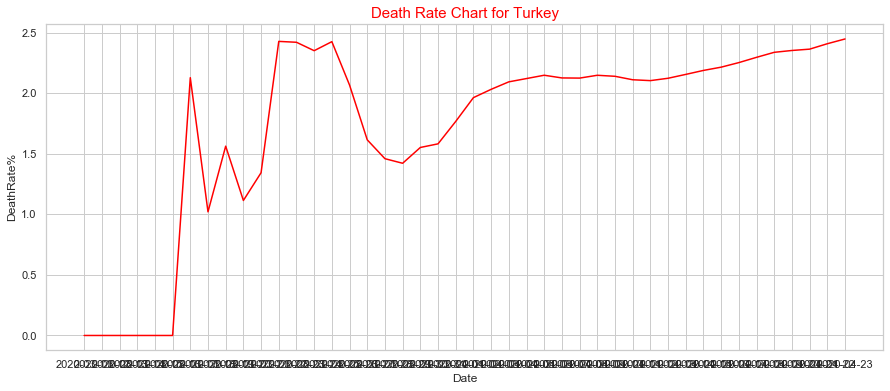

In [5]:
df_sub=df[['Country/Region','Last_Update','Confirmed','Deaths']]
df_sub=df_sub[df_sub['Country/Region']=='Turkey'].groupby(['Last_Update','Country/Region']).sum()
df_sub.reset_index(inplace=True)
deathrate=pd.DataFrame()
deathrate['Date']=df_sub['Last_Update']
deathrate['DeathRate%']=df_sub['Deaths']/df_sub['Confirmed']*100
plt.figure(figsize=(15,6))
plt.title("Death Rate Chart for Turkey",fontsize=15,color="red")
sns.lineplot(x="Date",y="DeathRate%",data=deathrate,color="red")

#### Problem 5: En çok nüfus popülasyonuna sahip ilk beş ülkenin günkük vaka artış sayılarının grafik ile karşılaştırılması.
Açıklama: Populasyon verileri sıralanır ve ilk beş ülke verileri dataframe içerisinde aranır ve grafik halinde karşılaştırılır.

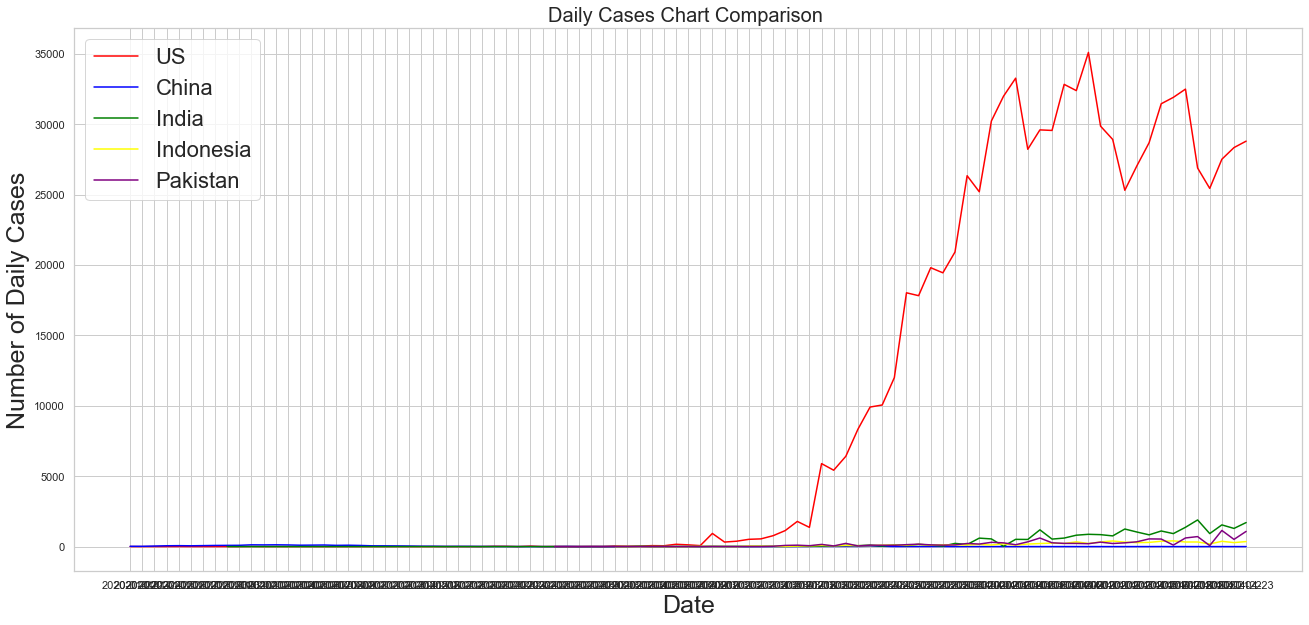

In [6]:
df_sub=df[['Country/Region','Last_Update','Daily_Con']]
df_sub=df_sub.groupby(['Last_Update','Country/Region']).sum()
df_sub.reset_index(inplace=True)
#df1_sub=df1.sort_values(by=['Population'],ascending=[False]).head(5)
china=df_sub[df_sub['Country/Region'] == 'China']
india=df_sub[df_sub['Country/Region'] == 'India']
us=df_sub[df_sub['Country/Region'] == 'US']
indonesia=df_sub[df_sub['Country/Region'] == 'Indonesia']
pakistan=df_sub[df_sub['Country/Region'] == 'Pakistan']

plt.figure(figsize=(22,10))
plt.plot(us.Last_Update,us.Daily_Con,color="red")
plt.plot(china.Last_Update,china.Daily_Con,color="blue")
plt.plot(india.Last_Update,india.Daily_Con,color="green")
plt.plot(indonesia.Last_Update,indonesia.Daily_Con,color="yellow")
plt.plot(pakistan.Last_Update,pakistan.Daily_Con,color="purple")
plt.xlabel("Date",fontsize=25)
plt.ylabel("Number of Daily Cases",fontsize=25)
plt.title("Daily Cases Chart Comparison ",fontsize=20)
plt.legend(('US', 'China', 'India','Indonesia','Pakistan'),loc='upper left',prop={"size":22})
plt.show()

#### Problem 6:23 Nisan tarihi itibariyle ülkelerin iyileşen insan sayılarına göre grafikle karşılaştırılması.
Açıklama: En çok iyileşme sayısına ulaşmış ilk on beş ülke baz alınarak oluşturulmuştur.

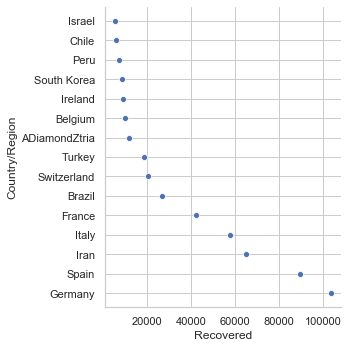

In [7]:
df_sub=df[['Country/Region','Last_Update','Recovered']]
df_sub=df_sub[df_sub['Last_Update']=='2020-04-23'].groupby(['Last_Update','Country/Region']).sum()
df_sub.reset_index(inplace=True)
df_sub=df_sub[['Country/Region','Recovered']].sort_values(by=['Recovered'],ascending=[False]).head(15)
sns.relplot('Recovered','Country/Region', data=df_sub)

#### Problem 7:Amerika Birleşik Devletlerinde Covid-19 virisünün yüzde olarak artışını grafik ile gösteriniz.
Açıklama: Günlük yeni vaka sayılarının mevcut toplam vaka sayısına bölünmesiyle elde edilen zamana göre artış grafiği oluşturuldu.

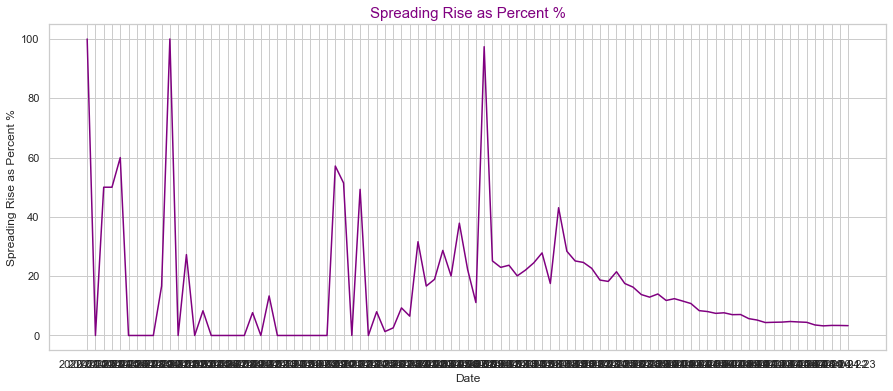

In [8]:
df_sub=df[df['Country/Region']=='US']
df_sub.reset_index(inplace=True)
df_sub=df_sub.groupby('Last_Update').sum()
df_sub.reset_index(inplace=True)
df_sub=df_sub[['Last_Update','Confirmed','Daily_Con']]
ad=pd.DataFrame()
ad['Date']=df_sub['Last_Update']
ad['Spreading Rise as Percent %']=df_sub['Daily_Con']/df_sub['Confirmed']*100
plt.figure(figsize=(15,6))
plt.title("Spreading Rise as Percent %",fontsize=15,color="purple")
sns.lineplot(x="Date",y="Spreading Rise as Percent %",data=ad,color="purple")

#### Problem 8: Amerika Birleşik Devletlerinde günlük test yapılan yapılan kişilerin yüzde kaçında hastalık tespit edilmiştir?
Açıklama:Amerikaya özel csv dosyası kullanılarak oluşturuldu 12-24Nisanarasındaki 12 günlük veriler baz alınmıştır.

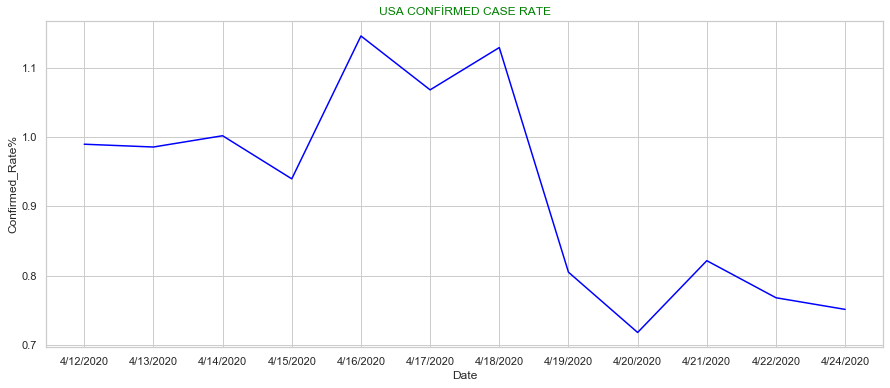

In [9]:
df2_sub=df2[df2['Country_Region']=='US'].groupby('Last_Update').sum()
df2_sub.reset_index(inplace=True)
df2_sub.iloc[0,15]=27766

qw=pd.DataFrame()
qw['Date']=df2_sub['Last_Update']
qw['Confirmed_Rate%']=df2_sub['Daily_Con']/df2_sub['People_Tested']*100

plt.figure(figsize=(15,6))
plt.title("USA CONFİRMED CASE RATE",fontsize=12,color="green")
sns.lineplot(x="Date",y="Confirmed_Rate%",data=qw,color="blue")


#### Problem 9:Amerika Birleşik Devletleri içerisinde 23 Nisan itibariyle şehirlere göre onaylanmış toplam vaka sayısını bar grafikle gösteriniz.

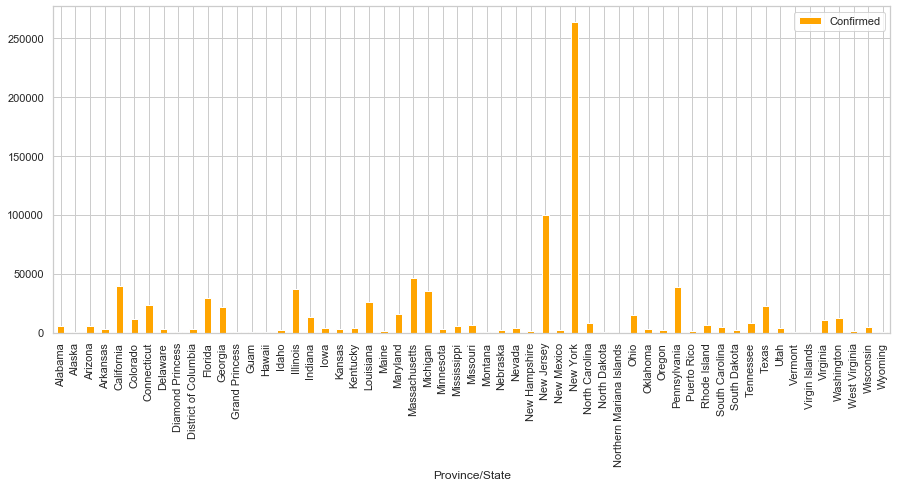

In [10]:
states=df[df['Country/Region']=='US']
states=states[states['Last_Update']=='2020-04-23']
states=states[['Province/State','Confirmed']]
states.plot(x='Province/State',y='Confirmed',kind='bar',color='orange')


#### Problem 10: 23 Nisan itibariyle dünya çapında hasta ,kurtulan ve hayatının kaybeden  toplam insan sayılarını gösteriniz.

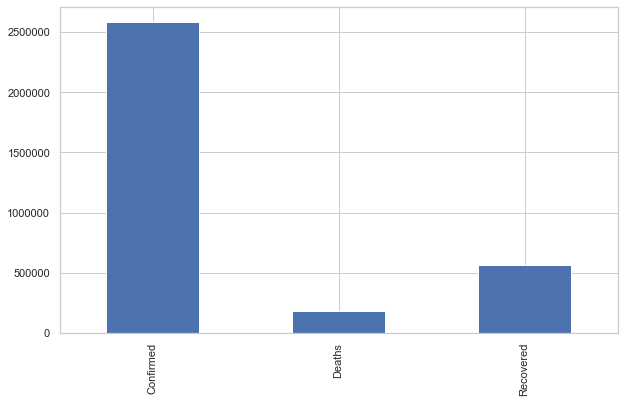

In [12]:
df_sub=df[df['Last_Update']=='2020-04-23'].groupby(['Last_Update','Country/Region']).sum()
df_sub.reset_index(inplace=True)
plt.figure(figsize=(10,6))
df_sub[['Confirmed','Deaths','Recovered']].agg('sum').plot(kind='bar')